# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7
label_name = "stat7"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [7]:

layers = [14, 5, 7]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [8]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 124.9486792087555
Epoch 1, Loss 122.78440868854523
Epoch 2, Loss 120.93885350227356
Epoch 3, Loss 119.38633489608765
Epoch 4, Loss 117.8638905286789
Epoch 5, Loss 116.63522434234619
Epoch 6, Loss 115.52682971954346
Epoch 7, Loss 114.73516118526459
Epoch 8, Loss 113.8150372505188
Epoch 9, Loss 113.10724866390228
Epoch 10, Loss 112.28635203838348
Epoch 11, Loss 111.68528234958649
Epoch 12, Loss 111.26496505737305
Epoch 13, Loss 110.75068759918213
Epoch 14, Loss 110.20906460285187
Epoch 15, Loss 109.78045046329498
Epoch 16, Loss 109.26563334465027
Epoch 17, Loss 108.89065611362457
Epoch 18, Loss 108.27512156963348
Epoch 19, Loss 108.09015953540802
Epoch 20, Loss 107.49963772296906
Epoch 21, Loss 107.28325021266937
Epoch 22, Loss 106.66389977931976
Epoch 23, Loss 106.11172139644623
Epoch 24, Loss 105.46675622463226
Epoch 25, Loss 104.9955883026123
Epoch 26, Loss 104.50650370121002
Epoch 27, Loss 103.76038420200348
Epoch 28, Loss 102.91288256645203
Epoch 29, Loss 102.140196561

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

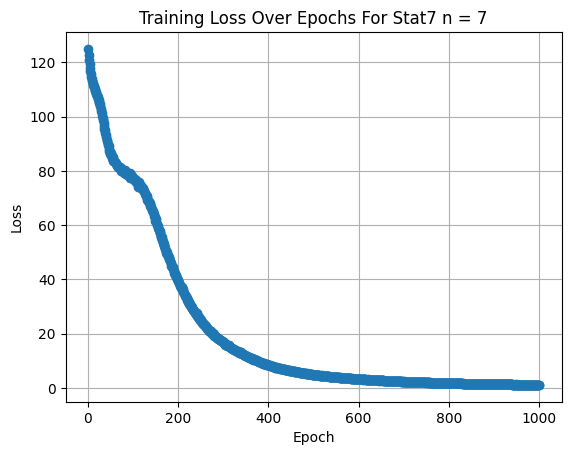

In [9]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat7 n = 7')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_Stat7.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

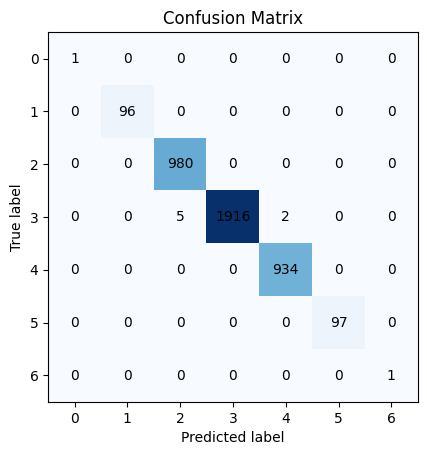

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 100.0%
Accuracy for class 3 = 99.63598543941758%
Accuracy for class 4 = 100.0%
Accuracy for class 5 = 100.0%
Accuracy for class 6 = 100.0%
Overall accuracy = 99.82638888888889%


In [10]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

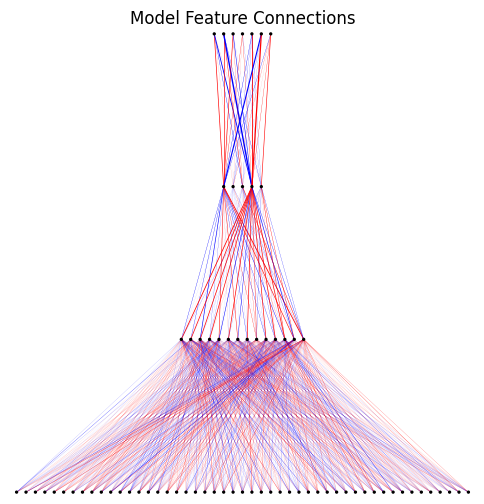

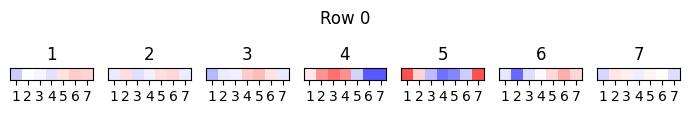

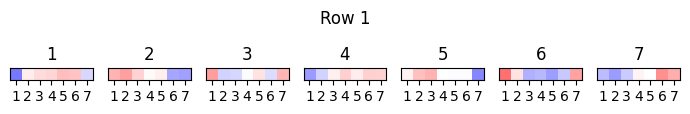

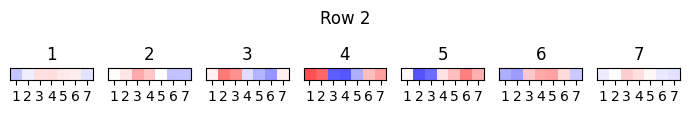

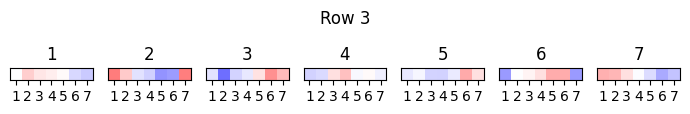

In [12]:



model.plot_connections()

model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0, 2)
model.plot_heatmap_feature(0, 3)


